# Objectives in Mini Market:
The business problem, following the revenue metrics, is to know which strategies can potentially lead to an increase in sales. This problem is further breakdown into the following specific objectives:
- Keystone Products
- Product placement strategy
- Strategies to sell high margin products
- Sale on products that can help to sell other products.


Market basket analysis is done applying Apriori algorithm which is based on Association learning. This helped to determine the answers and strategies for the above stated objectives, and are:
- Keystone products:
'mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate', 'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes', 'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp', 'tomatoes', 'olive oil', 'frozen smoothie', 'turkey'.

- Product placement strategy:
'spaghetti' is sold more in a combined cart containing 'ground beef', 'tomatoes' or 'tomato sauce', 'olive oil' or 'cooking oil'.
Selling 'milk' is more favored by the presence of 'bread' and 'frozen vegetables'.

- Strategies to sell high margin products:
Neighboring placement of 'burgers' and 'milk' alongside 'cake' can help increase sales of 'cake'.
Similarly, placement of 'light cream' and 'olive oil' alongside 'Chicken' can increase sales of 'Chicken', and
'spaghetti' and 'milk' can increase sales of 'frozen vegetables'.

- Sale on products that can help to sell other products:
Discounts on 'fromage blanc' will boost sales of 'honey'.
Sales on 'Ground beef' and 'spaghetti' will increase selling of 'tomato sauce' and 'olive oil'.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud
import squarify

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1. Exploring Dataset

In [4]:
data = pd.read_csv('dataset.csv', header = None)
print(data.shape)
data.head()

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset is a sample that contains list of products purchased by 7500 customers in Lie Fang
- Some customers have only purchased one product whereas maximum 20 products have been purchased by one customer.

# 2. Exploring Itemset

In [5]:
itemset = []
for i in range(data.shape[0]):
    itemset.append([str(data.values[i,j]) for j in range(data.shape[1])])

In [6]:
for product in itemset[4]:
    print(product, end=" | ")

mineral water | milk | energy bar | whole wheat rice | green tea | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | nan | 

In [7]:
cleaned_itemset = []
for each in itemset:
    for item in each:
        if str(item).lower() != 'nan':
            cleaned_itemset.append(item)
            
print("There are {} unique items.".format(len(set(cleaned_itemset))))

There are 120 unique items.


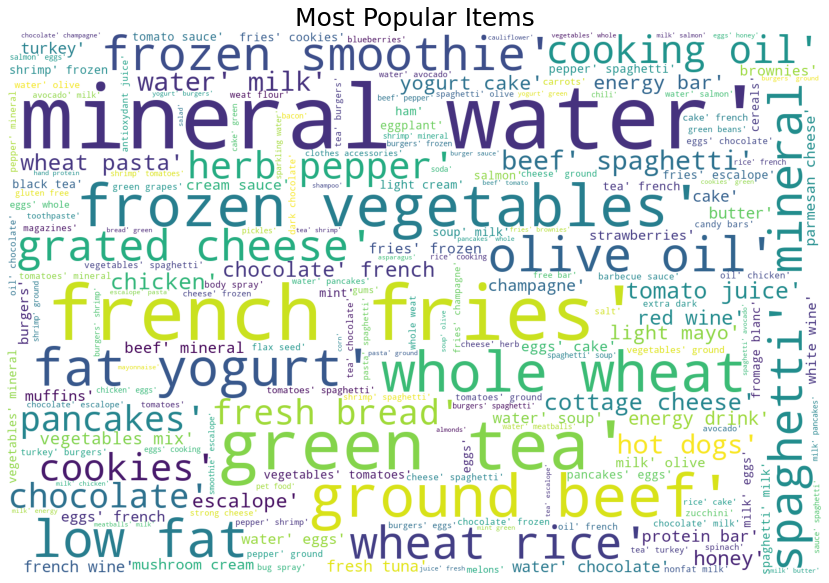

In [8]:
plt.rcParams['figure.figsize'] = (15, 10)
wordcloud = WordCloud(background_color = 'white', width = 1500,  height = 1000)\
                        .generate(str(cleaned_itemset))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 25)
plt.show()

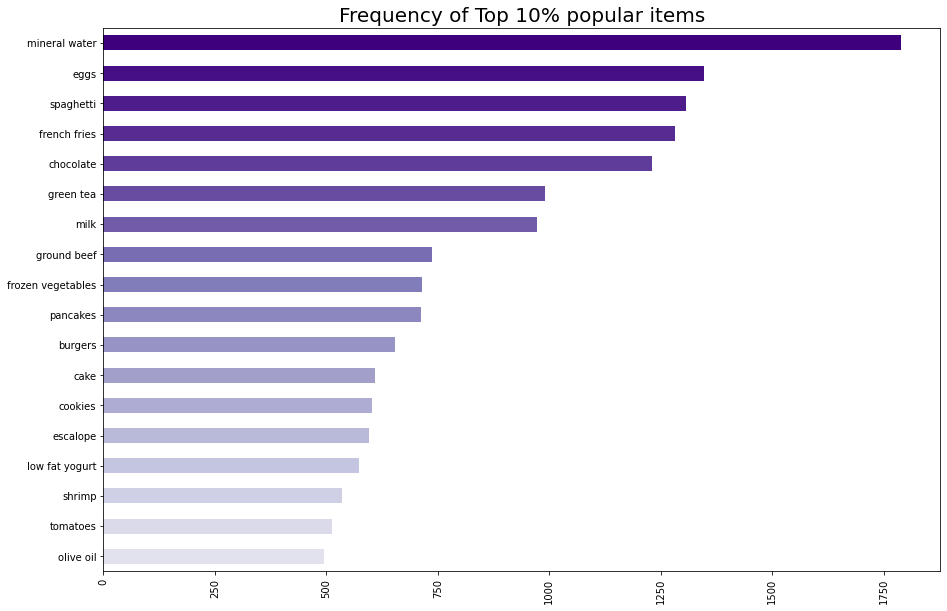

In [9]:
# looking at the frequency of Top 20% popular items
ten = int(0.15*len(set(cleaned_itemset)))
plt.rcParams['figure.figsize'] = (15, 10)
color = plt.cm.Purples(np.linspace(0.2, 1, ten))
pd.DataFrame(cleaned_itemset)[0].value_counts().head(ten).sort_values().plot.barh(color = color)
plt.title('Frequency of Top 10% popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

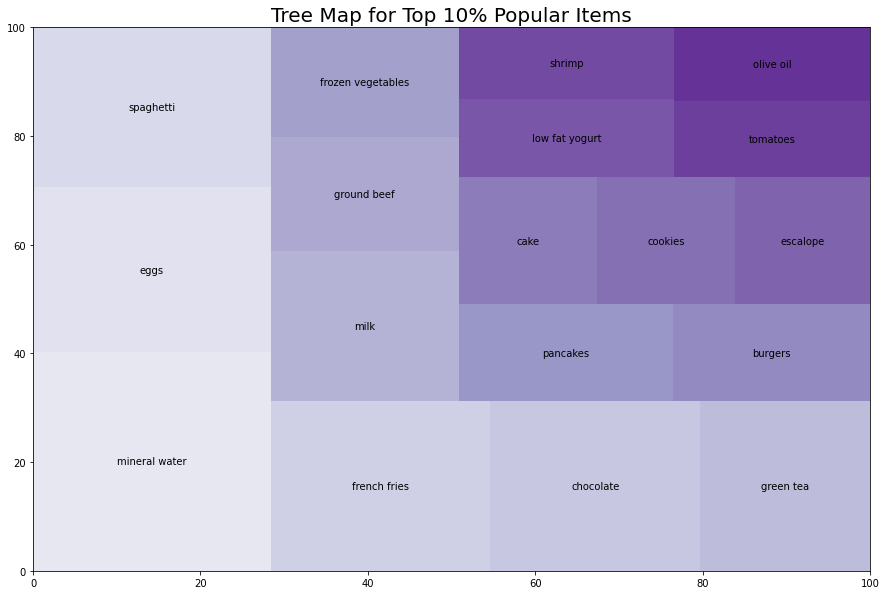

In [10]:
tree = pd.DataFrame(cleaned_itemset)[0].value_counts().head(ten).to_frame()
plt.rcParams['figure.figsize'] = (15, 10)
color = plt.cm.Purples(np.linspace(0.2, 1, ten))
squarify.plot(sizes = tree.values, label = tree.index, alpha=.8, color = color)
plt.title('Tree Map for Top 10% Popular Items', fontsize = 20)
plt.axis()
plt.show()

# 3. Apriori algorithm theory

Association Rule finds an association between different products in a set and finds frequent patterns in a transaction database such as purchasing behavior analysis. The applications of Association Rule are in Marketing, Basket Data Analysis (or Market Basket Analysis) in retailing, clustering, and classification. The association rule learning has three popular algorithms – Apriori, Eclat, and FP-Growth.

This repository is dedicated to the Apriori algorithm for Market Basket Analysis. The approach is based on the theory that customers who buy a specific product (or group of products) are more likely to buy another particular product (or group of products).

Market Basket Analysis aims to find relationships and establish patterns across purchases. The relationship is modeled in the form of a conditional algorithm: IF { itemset ‘A’ } THEN { itemset ‘C’ }

- itemset' : A collection of products/items purchased by a customer
- antecedent : The set of products on the Left-hand side of the rule
- consequent : The set of products on the Right-hand side of the rule.

# 4. Data Preprocessing

- Cleaning the data (Removing NULL and NaN items)

In [11]:
new = {'items': []}
       
for i in range(data.shape[0]):
    product_list = []
    for j in range(data.shape[1]):
        product = data.iloc[i,j]
        if str(product).lower() != 'nan':
            product_list.append(product)
    new['items'].append(product_list)
       
new_df = pd.DataFrame(new)
new_df.head(3)

,items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]


- One-hot encoding

In [12]:
def do_one_hot(dataframe):
    df_new = pd.DataFrame()
    #For every row in the dataframe, iterate through the list of items and place a 1 into the corresponding column
    for index, row in dataframe.iterrows():
        for each in row['items']:
            df_new.at[index, each] = 1
    #Filling in the NaN values with 0 to show that a transaction doesn't have that column's item
    df_new = df_new.fillna(0)
    dataframe = dataframe.drop(['items'], axis=1)
    dataframe = pd.concat([dataframe, df_new], axis=1)
    return dataframe

new_df = do_one_hot(new_df)
new_df.head(3)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Results of The Rules from Apriopri Algorithm

Suppose we want to find the association of products which are sold at least 3 times a day.
So, the minimum support here will be (3 times per day) (7 days a week) / (the total number of transactions). That means (37)/7501 = 0.00279. So the equivalent 0.003 is taken here as support.

In [13]:
itemsets = apriori(new_df, min_support=0.003, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=1.5)
rules.shape

(3542, 9)

In [14]:
rules.iloc[27]

antecedents            (pasta)
consequents           (shrimp)
antecedent support    0.015731
consequent support    0.071457
support               0.005066
confidence            0.322034
lift                  4.506672
leverage              0.003942
conviction            1.369601
Name: 27, dtype: object

# Explanation for the above resulted rule:

For instance from the first item, we can see that 'pasta' and 'shrimp' are commonly bought together. This makes sense because "the shrimp pasta dish" is very popular.

- The antecedent support is 0.015731 means that 'pasta' is purchased in 118 transactions out of 7501.

- The consequent support is 0.071457 means that 'shrimp' is purchased in 536 transactions out of all.

- The support is 0.005066 means that 'pasta' and 'shrimp' are both purchased together in 38 transactions out of all.

- The confidence level for the rule is 0.32 which shows that out of all the transactions that contain 'pasta', 32% of the transactions also contain 'shrimp'. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

- The lift of 4.5 tells us that 'shrimp' is 4.5 times more likely to be bought by the customers who buy 'pasta' compared to the default likelihood of the sale of 'shrimp'. If Antecedent and Consequent are independent, the Lift score will be exactly 1.

- The leverage of 0.003942 indicates the difference of 30 transactions between the observed frequency of 'Pasta and Shrimp' appearing together and the frequency that would be expected if they were independent. An leverage value of 0 indicates independence.

- Finally, the conviction value 1.369601 is the dependency measure of 'Shrimp' on 'Pasta'. A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

# 6. Results

# - Keystone Products:

Keystone products are those that differentiate themselves in the market and could potentially hurt business if they were unavailable or more expensive. Unavailability is the question of Stock-outs. Expensiveness of the product is subjected to Cost/Pricing analysis.

Keystone products are generally the antecedent products with the highest support values. 

Support is the probability that the customer will buy the product.

In [15]:
key_list = rules.sort_values(by="antecedent support", ascending=False)[:1500]['antecedents'].to_list()
keystone = []
for each in key_list:
    for product in each:
        keystone.append(product) if product not in keystone else None
print(len(keystone))        
for product in keystone:
    print(product, end=" | ")

20
mineral water | eggs | spaghetti | french fries | chocolate | green tea | milk | ground beef | frozen vegetables | pancakes | burgers | cake | cookies | escalope | low fat yogurt | shrimp | tomatoes | olive oil | frozen smoothie | turkey | 

Here, we are taking unique products from top 20% Antecedents in terms of support values.

Keystone products are: 

'mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate', 'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes', 'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp', 'tomatoes', 'olive oil', 'frozen smoothie', 'turkey'.

# - Product placement strategy:

Confidence can be used for product placement strategy and increasing sales. The probability that a customer will purchase a Consequent on the condition of purchasing an antecedent is referred to as the confidence of the rule. Product pairs with highest confidence should be placed together always.

In [16]:
rules[(rules.consequents!={'mineral water'}) & (rules.confidence >= 0.5)]\
            .sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3000,"(ground beef, cereals)",(spaghetti),0.004533,0.174110,0.003066,0.676471,3.885303,0.002277,2.552751
2085,"(tomatoes, olive oil)",(spaghetti),0.007199,0.174110,0.004399,0.611111,3.509912,0.003146,2.123717
3267,"(frozen vegetables, soup, mineral water)",(milk),0.005066,0.129583,0.003066,0.605263,4.670863,0.002410,2.205057
2991,"(ground beef, tomato sauce)",(spaghetti),0.005333,0.174110,0.003066,0.575000,3.302508,0.002138,1.943270
2873,"(ground beef, cooking oil)",(spaghetti),0.008399,0.174110,0.004799,0.571429,3.281995,0.003337,1.927076
3459,"(ground beef, tomatoes, mineral water)",(spaghetti),0.005466,0.174110,0.003066,0.560976,3.221959,0.002115,1.881194
3529,"(frozen vegetables, ground beef, chocolate)",(spaghetti),0.005733,0.174110,0.003066,0.534884,3.072100,0.002068,1.775663
3514,"(milk, frozen vegetables, ground beef)",(spaghetti),0.005733,0.174110,0.003066,0.534884,3.072100,0.002068,1.775663
2403,"(eggs, red wine)",(spaghetti),0.007066,0.174110,0.003733,0.528302,3.034297,0.002503,1.750887
820,"(shrimp, ground beef)",(spaghetti),0.011465,0.174110,0.005999,0.523256,3.005315,0.004003,1.732354


# - Strategy to sell high margin products:

Placing high margin items near associated high confidence (driver) items (if one of the Keystone products than better) can increase the overall margin on purchases. Let's say that 'spaghetti' and 'ground beef' are the high margin products.

In [17]:
bottom = rules.sort_values(by="antecedent support")[:75]['antecedents'].to_list()
least_sold = []
for each in bottom:
    for product in each:
        if product not in least_sold:
            least_sold.append(product) if product not in keystone else None
print(len(least_sold))
for product in least_sold:
    print(product, end=" | ")

15
soup | cereals | tomato sauce | light cream | herb & pepper | chicken | whole wheat rice | salmon | pepper | grated cheese | fresh bread | cottage cheese | cooking oil | red wine | avocado | 

In [18]:
rules[rules['consequents'] == {'cake'}].sort_values(by='confidence', ascending=False).head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2205,"(milk, burgers)",(cake),0.017864,0.081056,0.003733,0.208955,2.577916,0.002285,1.161684
1328,"(burgers, mineral water)",(cake),0.024397,0.081056,0.004799,0.196721,2.426984,0.002822,1.143992


In [19]:
rules[rules['consequents'] == {'chicken'}].sort_values(by='confidence', ascending=False).head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
469,(light cream),(chicken),0.015598,0.059992,0.004533,0.290598,4.843951,0.003597,1.325072
2032,"(milk, olive oil)",(chicken),0.017064,0.059992,0.003600,0.210938,3.516094,0.002576,1.191297


In [20]:
rules[rules['consequents'] == {'frozen smoothie'}].sort_values(by='confidence', ascending=False).head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3076,"(milk, spaghetti, mineral water)",(frozen smoothie),0.015731,0.063325,0.003200,0.203390,3.211847,0.002203,1.175826
1953,"(milk, spaghetti)",(frozen smoothie),0.035462,0.063325,0.005599,0.157895,2.493407,0.003354,1.112302


# - Sale on products that can help to sell other products:
Providing discounts or sale on the products which provide greater lift to the consequents can help improve the overall sales metrics.

In [21]:
rules[rules.lift>=5].sort_values(by=["lift","antecedent support"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3270,"(milk, mineral water)","(frozen vegetables, soup)",0.047994,0.007999,0.003066,0.063889,7.987176,0.002682,1.059704
3271,"(frozen vegetables, soup)","(milk, mineral water)",0.007999,0.047994,0.003066,0.383333,7.987176,0.002682,1.543794
3095,"(frozen vegetables, olive oil)","(milk, mineral water)",0.011332,0.047994,0.003333,0.294118,6.128268,0.002789,1.348676
3094,"(milk, mineral water)","(frozen vegetables, olive oil)",0.047994,0.011332,0.003333,0.069444,6.128268,0.002789,1.062449
1223,"(whole wheat pasta, mineral water)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145
1226,(olive oil),"(whole wheat pasta, mineral water)",0.065858,0.009599,0.003866,0.058704,6.115863,0.003234,1.052168
3053,"(frozen vegetables, chocolate)","(shrimp, mineral water)",0.022930,0.023597,0.003200,0.139535,5.913283,0.002658,1.134739
3052,"(shrimp, mineral water)","(frozen vegetables, chocolate)",0.023597,0.022930,0.003200,0.135593,5.913283,0.002658,1.130336
3272,"(frozen vegetables, mineral water)","(milk, soup)",0.035729,0.015198,0.003066,0.085821,5.646864,0.002523,1.077253
3269,"(milk, soup)","(frozen vegetables, mineral water)",0.015198,0.035729,0.003066,0.201754,5.646864,0.002523,1.207988


# 7. Conclusion

Market Basket Analysis or the rules resulted applying The Apriori algorithm which is another style of the association learning can help the business find interesting insights to find the Keystone products, their placement with poorly performing products to increase sales and strategies to improve revenue by enabling sell of high margin products.